In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
tf.enable_eager_execution()

In [2]:
def plot(img, pts):
    plt.figure(figsize=(12,12))
    plt.imshow(img)
#     for p in range(pts.shape[0]):
    plt.plot(pts[0], pts[1],'r.')
#         plt.text(pts[p,0], pts[p,1], '{0}'.format(p))
#     for ie, e in enumerate(edges):
#         rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
#         plt.plot(pts[e,0],pts[e,1],color=rgb)
    plt.axis('off')
    plt.show()

In [3]:

def read_tfrecord(example):
    features = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'labels': tf.io.FixedLenFeature([], tf.string)
    }
    sample=tf.io.parse_single_example(example, features)
    labels = tf.io.decode_raw(sample['labels'], tf.float64)
    labels = tf.reshape(labels, [2,19])
    labels = labels[:,:15]
    labels = tf.dtypes.cast(labels, tf.float32)
    image = tf.io.decode_raw(sample['image'], tf.uint8)
    image = tf.reshape(image, [224, 224, 3])
    image, labels = augmentation(image,labels)
    return image, labels

def augmentation(image, labels):
#     image = tf.cast(image, tf.float32)
#     image = tf.image.per_image_standardization(image)
    return image, labels

def load():
    path='/home/antreas/Desktop/tf_records_file/train_tf/tf_records1.tfrecords'
    dataset = tf.data.TFRecordDataset(path).map(read_tfrecord).shuffle(500)

    for next_element in dataset:
        return next_element

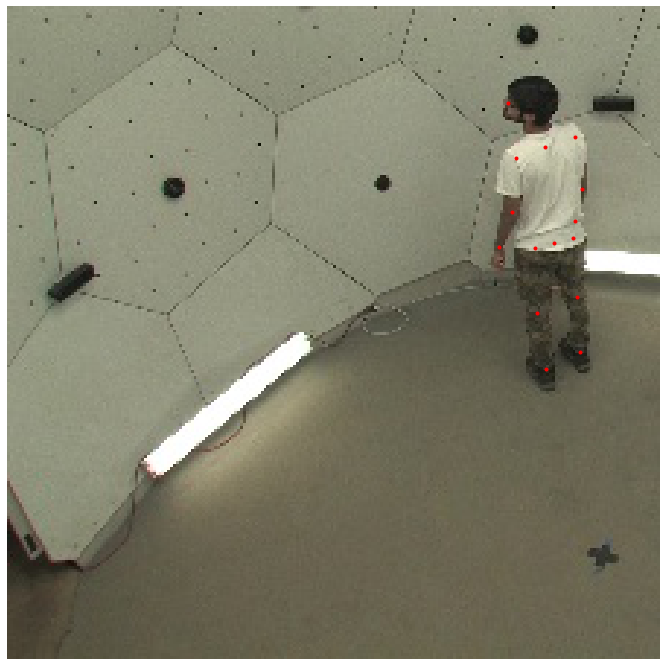

In [4]:
img, labels=load()
plot(img.numpy(), (labels.numpy()))